# **face detection 구현하기**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
!pip install koreanize_matplotlib #pyplt korean version
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.1 MB/s eta 0:00:00




*   과제 1에서 제출한 sh1, sh2 이미지를 가져온다
*   파일 이름은 과제 제출 시 작성한 이름과 수정, 이미지는 동일



In [23]:
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

Saving sh2.jpg to sh2 (1).jpg
Saving sh1.jpg to sh1 (1).jpg


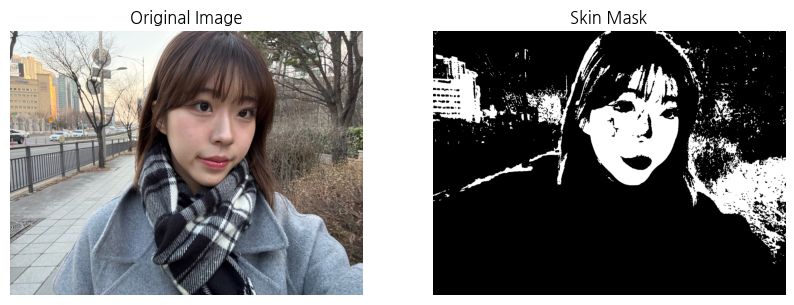

In [27]:
# 이미지 파일 경로 (업로드된 파일 사용)
img_path = list(uploaded.keys())[1]

# 이미지 읽기
img = cv2.imread(img_path)

# BGR to HSV 변환
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 피부색 HSV 범위
lower_skin = np.array([3, 40, 80], dtype=np.uint8)
upper_skin = np.array([20, 200, 255], dtype=np.uint8)


# HSV 이미지에서 피부색 영역 추출
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# 모폴로지 연산으로 노이즈 제거 (optional)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # 열림 연산
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # 닫힘 연산


# 결과 출력 (선택 사항)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Skin Mask")
plt.axis('off')

plt.show()


Bounding box coordinates: x=1711, y=384, width=1094, height=1389


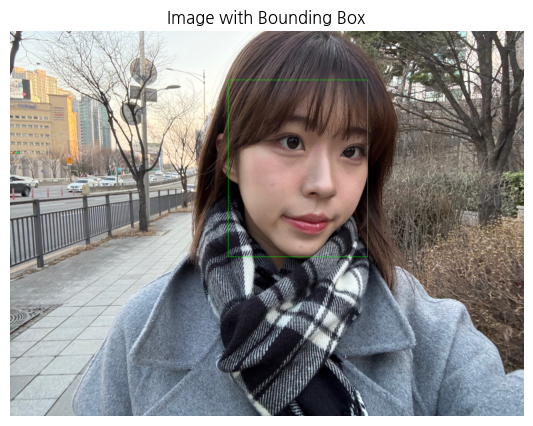

In [25]:

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (presumably the face)
largest_contour = max(contours, key=cv2.contourArea, default=None)

if largest_contour is not None:
    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Draw the bounding box on the original image
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Print the bounding box coordinates
    print(f"Bounding box coordinates: x={x}, y={y}, width={w}, height={h}")

    # Display the image with the bounding box
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Image with Bounding Box")
    plt.axis('off')
    plt.show()
else:
    print("No face detected.")


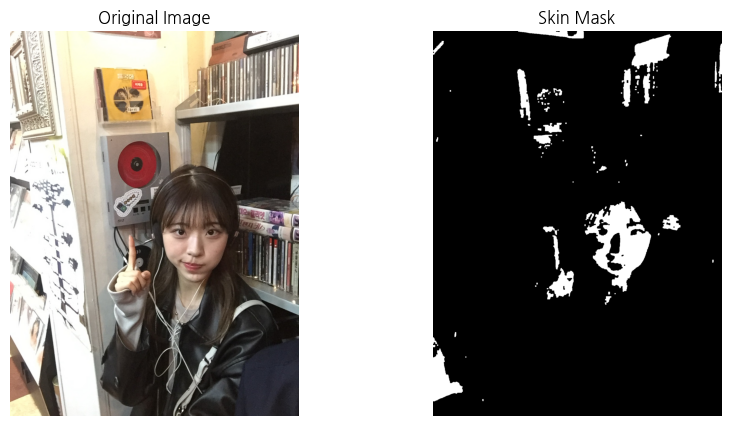

In [32]:
# 이미지 파일 경로 (업로드된 파일 사용)
img_path = list(uploaded.keys())[0]

# 이미지 읽기
img = cv2.imread(img_path)

# BGR to HSV 변환
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 피부색 HSV 범위
lower_skin = np.array([5, 60, 80], dtype=np.uint8)
upper_skin = np.array([15, 150, 230], dtype=np.uint8)

# HSV 이미지에서 피부색 영역 추출
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# 모폴로지 연산으로 노이즈 제거 (optional)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # 열림 연산
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # 닫힘 연산


# 결과 출력 (선택 사항)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Skin Mask")
plt.axis('off')

plt.show()


Bounding box coordinates: x=673, y=756, width=293, height=400


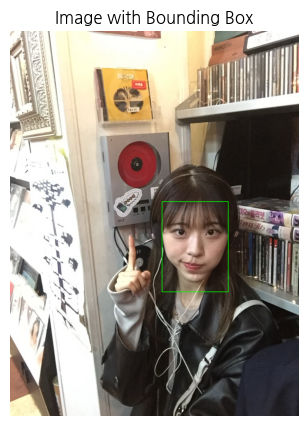

In [33]:


# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (presumably the face)
largest_contour = max(contours, key=cv2.contourArea, default=None)

if largest_contour is not None:
    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Draw the bounding box on the original image
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Print the bounding box coordinates
    print(f"Bounding box coordinates: x={x}, y={y}, width={w}, height={h}")

    # Display the image with the bounding box
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Image with Bounding Box")
    plt.axis('off')
    plt.show()
else:
    print("No face detected.")




---








# **face detection 과 face recognition 직접 실행하기**

In [39]:
!pip install -qq deepface
!pip install -qq ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━

In [40]:
import tensorflow_datasets as tfds
ds, ds_info = tfds.load("lfw", split="train", with_info=True)
print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/lfw/incomplete.L049IX_0.1.1/lfw-train.tfrecord*...:   0%|          | 0/132…

Dataset lfw downloaded and prepared to /root/tensorflow_datasets/lfw/0.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='lfw',
    full_name='lfw/0.1.1',
    description="""
    Labeled Faces in the Wild: A Database for Studying Face Recognition in
    Unconstrained Environments
    """,
    homepage='http://vis-www.cs.umass.edu/lfw',
    data_dir='/root/tensorflow_datasets/lfw/0.1.1',
    file_format=tfrecord,
    download_size=172.20 MiB,
    dataset_size=180.28 MiB,
    features=FeaturesDict({
        'image': Image(shape=(250, 250, 3), dtype=uint8),
        'label': Text(shape=(), dtype=string),
    }),
    supervised_keys=('label', 'image'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=13233, num_shards=2>,
    },
    citation="""@TechReport{LFWTech,
        author = {Gary B. Huang and Manu Ramesh and Tamara Berg and Erik Learned-Miller},
        title = {Labeled Faces in the Wild: A

In [41]:
from deepface import DeepFace

import numpy as np
import cv2
from deepface import DeepFace
from deepface.modules import preprocessing
from tqdm import tqdm

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

25-04-25 18:20:49 - Directory /root/.deepface has been created
25-04-25 18:20:49 - Directory /root/.deepface/weights has been created


- 오늘 찍은 이미지 두개를 업로드해서 detection과 recognition을 진행한다
- 파일 이름은 각각 sh3, sh4이다

In [42]:
from google.colab import files
uploaded = files.upload()

Saving sh4.jpg to sh4.jpg
Saving sh3.jpg to sh3.jpg


In [116]:
%%time
#detector #사진에서 얼굴이 어디에 있는지 찾음
detected_face = DeepFace.extract_faces('sh3.jpg', detector_backend="opencv")

CPU times: user 15.7 s, sys: 524 ms, total: 16.2 s
Wall time: 16.6 s


In [103]:
print(type(detected_face))
print(len(detected_face))
print(type(detected_face[0]))
print(detected_face[0].keys())


print(detected_face[0]['face'].shape) #얼굴 사각형 이미지
print(detected_face[0]['facial_area'])
print(detected_face[0]['confidence'])

<class 'list'>
2
<class 'dict'>
dict_keys(['face', 'facial_area', 'confidence'])
(530, 530, 3)
{'x': 2050, 'y': 2223, 'w': 530, 'h': 530, 'left_eye': None, 'right_eye': None}
0.97


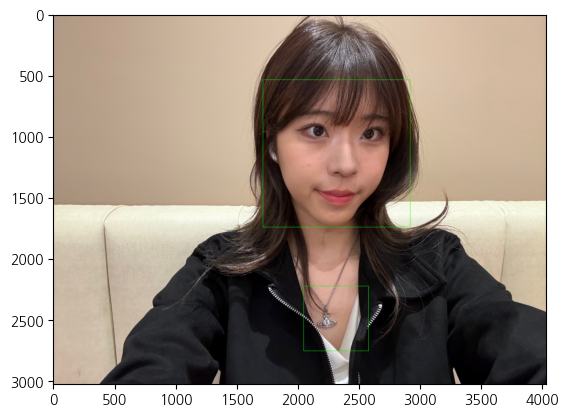

In [104]:
img = cv2.imread('sh3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for face in detected_face:
  x,y,w,h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(img)

In [117]:
%%time
#detector #사진에서 얼굴이 어디에 있는지 찾음
detected_face = DeepFace.extract_faces('sh3.jpg', detector_backend="yolov8")

CPU times: user 7.21 s, sys: 504 ms, total: 7.71 s
Wall time: 7.84 s


{'x': 1830, 'y': 463, 'w': 939, 'h': 1255, 'left_eye': (2592, 989), 'right_eye': (2130, 968)}


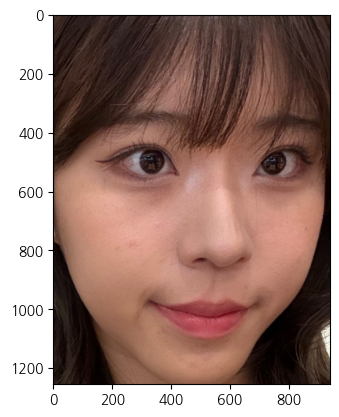

In [118]:
print(detected_face[0]['facial_area'])
plt.imshow(detected_face[0]['face'])


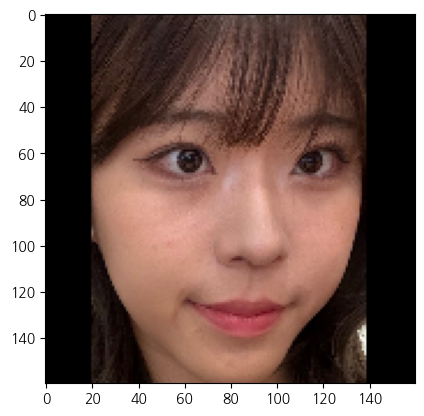

In [119]:
preprocessed_face = preprocessing.resize_image(
    img=detected_face[0]['face'], target_size=(160, 160))
preprocessed_face = preprocessing.normalize_input(
    img=preprocessed_face, normalization='base')

plt.imshow(preprocessed_face[0])

In [120]:
%%time
embedding = DeepFace.represent(
    preprocessed_face[0], model_name="Facenet",
    enforce_detection=False, normalization = "raw")

CPU times: user 841 ms, sys: 20.6 ms, total: 862 ms
Wall time: 792 ms


In [121]:
print(embedding[0].keys())
print(len(embedding[0]['embedding']))
print(np.array(embedding[0]['embedding']))

dict_keys(['embedding', 'facial_area', 'face_confidence'])
128
[    0.03512     -1.8458     0.71536     -1.0621     0.74128    -0.88863    -0.79598     -1.4929     -1.7739    -0.46004     0.88469    -0.46814     0.12766    -0.76567     0.91411      1.5456      1.1362     0.83347     0.59457      1.0538    -0.15095   0.0058794     0.38582     -1.3571     0.83781      1.2553
      1.3011     0.54526    0.088195     -1.0309    -0.28726    0.016811     0.57757     -1.3412     0.33396       1.308     0.98799     0.27549     0.93454      1.0728     0.72418    -0.73535      1.1262    -0.38954    -0.55743    0.070797    -0.21306     -1.0511    -0.78547    -0.36653    -0.67902    -0.11898
     0.19797   -0.057254      0.7851    -0.41491     0.75765      1.8733     0.24232    -0.55853      1.7931     -1.2206    -0.25506      2.0469    -0.95382     0.45925       1.322    -0.98525      1.7024    -0.80578     -1.2915     -1.3247    -0.76017    -0.24185      1.5879       1.349    0.023331     0.5366

In [175]:
embedding1 = DeepFace.represent(
    'sh3.jpg', model_name="Facenet", detector_backend="yolov8",
    enforce_detection=True, normalization = "base")

In [176]:
print(np.array(embedding1[0]['embedding']))

[   -0.26022      -2.018     0.72849    -0.68904     0.93182     -1.1079    -0.59878     -1.5497     -1.8739    -0.53675     0.99086    -0.78458     0.17523    -0.87024     0.86305      1.1952      1.5256     0.94953     0.22485      1.0061   0.0032658    -0.36209     0.45429      -1.475     0.80769         1.2
      1.4637     0.53058     0.25869    -0.90642    -0.40074   -0.054322     0.52415     -1.3984       0.447      1.1334     0.97366     0.26923      0.6698      0.8926     0.94065    -0.95828      1.3696    -0.18672    -0.31974    0.033959   -0.064522     -1.0188    -0.80548    -0.59311    -0.66638    -0.13904
     0.16014      -0.119      0.6973    -0.23646      1.0042      1.8744     0.36912    -0.56493      1.6866     -1.1852    -0.09703      2.2712     -1.1735     0.60362      1.1503     -1.2419      1.7611    -0.94538     -1.2444     -1.4596    -0.86441    -0.18095      1.5798      1.2744     0.23503     0.48773
     0.77662     -0.7887    -0.88369      1.3765    -0.20071 

In [177]:
#뽑은 임베딩이 얼마나 다른지 측정해보자

emb = np.array(embedding[0]['embedding']) #yolo detector를 사용해서 직접 뽑은 embedding
emb1 = np.array(embedding1[0]['embedding']) #file에서 deepface 자동으로 뽑은 embedding

print(np.linalg.norm(emb)) #emb의 백터 크기(L2 norm)
print(np.linalg.norm(emb1))

#L2 distance -> 거리
print(np.linalg.norm(emb - emb1))

#cos similarity -> 각도
emb_norm = emb / np.linalg.norm(emb) #normalization : Vector의 크기를 1로 만드는 것
print(np.linalg.norm(emb_norm)) #1
emb1_norm = emb1 / np.linalg.norm(emb1)
print(np.dot(emb_norm, emb1_norm)) #두 벡터가 같으면 각이 0이랑 가까워야한다,

10.49012651037232
10.712528993442714
2.081216819138187
0.9999999999999999
0.980947850076703


- 이제 이미지 sh4에 대해서 진행한다

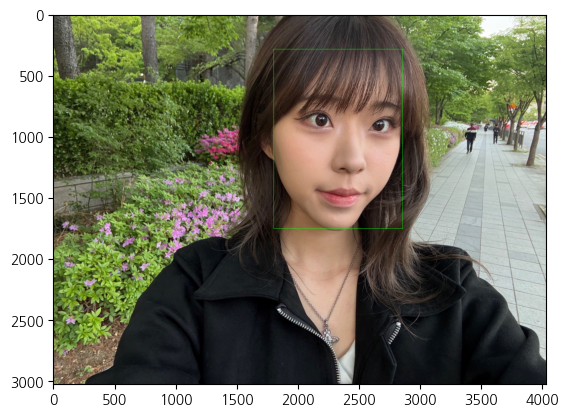

In [187]:
detected_face2 = DeepFace.extract_faces('sh4.jpg', detector_backend="yolov8")

preprocessed_face2 = preprocessing.resize_image(
    img=detected_face[0]['face'], target_size=(160, 160))
preprocessed_face2 = preprocessing.normalize_input(
    img=preprocessed_face, normalization='base')

embedding2 = DeepFace.represent(
    preprocessed_face2[0], model_name="Facenet",
    enforce_detection=False, normalization = "raw")

embedding3 = DeepFace.represent(
    'sh4.jpg', model_name="Facenet", detector_backend="yolov8",
    enforce_detection=True, normalization = "base")

img2 = cv2.imread('sh4.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

x, y, w, h = detected_face2[0]['facial_area']['x'], detected_face2[0]['facial_area']['y'], detected_face2[0]['facial_area']['w'], detected_face2[0]['facial_area']['h']
img_show2 = cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img_show2)

In [179]:
print(embedding2[0].keys())
print(len(embedding[0]['embedding']))
print(np.array(embedding[0]['embedding']))

dict_keys(['embedding', 'facial_area', 'face_confidence'])
128
[    0.03512     -1.8458     0.71536     -1.0621     0.74128    -0.88863    -0.79598     -1.4929     -1.7739    -0.46004     0.88469    -0.46814     0.12766    -0.76567     0.91411      1.5456      1.1362     0.83347     0.59457      1.0538    -0.15095   0.0058794     0.38582     -1.3571     0.83781      1.2553
      1.3011     0.54526    0.088195     -1.0309    -0.28726    0.016811     0.57757     -1.3412     0.33396       1.308     0.98799     0.27549     0.93454      1.0728     0.72418    -0.73535      1.1262    -0.38954    -0.55743    0.070797    -0.21306     -1.0511    -0.78547    -0.36653    -0.67902    -0.11898
     0.19797   -0.057254      0.7851    -0.41491     0.75765      1.8733     0.24232    -0.55853      1.7931     -1.2206    -0.25506      2.0469    -0.95382     0.45925       1.322    -0.98525      1.7024    -0.80578     -1.2915     -1.3247    -0.76017    -0.24185      1.5879       1.349    0.023331     0.5366

In [180]:
print(embedding3[0].keys())
print(len(embedding[0]['embedding']))
print(np.array(embedding[0]['embedding']))

dict_keys(['embedding', 'facial_area', 'face_confidence'])
128
[    0.03512     -1.8458     0.71536     -1.0621     0.74128    -0.88863    -0.79598     -1.4929     -1.7739    -0.46004     0.88469    -0.46814     0.12766    -0.76567     0.91411      1.5456      1.1362     0.83347     0.59457      1.0538    -0.15095   0.0058794     0.38582     -1.3571     0.83781      1.2553
      1.3011     0.54526    0.088195     -1.0309    -0.28726    0.016811     0.57757     -1.3412     0.33396       1.308     0.98799     0.27549     0.93454      1.0728     0.72418    -0.73535      1.1262    -0.38954    -0.55743    0.070797    -0.21306     -1.0511    -0.78547    -0.36653    -0.67902    -0.11898
     0.19797   -0.057254      0.7851    -0.41491     0.75765      1.8733     0.24232    -0.55853      1.7931     -1.2206    -0.25506      2.0469    -0.95382     0.45925       1.322    -0.98525      1.7024    -0.80578     -1.2915     -1.3247    -0.76017    -0.24185      1.5879       1.349    0.023331     0.5366

In [181]:
#뽑은 임베딩이 얼마나 다른지 측정해보자

emb2 = np.array(embedding2[0]['embedding']) #yolo detector를 사용해서 직접 뽑은 embedding
emb3 = np.array(embedding3[0]['embedding']) #file에서 deepface 자동으로 뽑은 embedding

print(np.linalg.norm(emb2)) #emb의 백터 크기(L2 norm)
print(np.linalg.norm(emb3))

#L2 distance -> 거리
print(np.linalg.norm(emb2 - emb3))

#cos similarity -> 각도
emb2_norm = emb2 / np.linalg.norm(emb2) #normalization : Vector의 크기를 1로 만드는 것
print(np.linalg.norm(emb2_norm))
emb3_norm = emb3 / np.linalg.norm(emb3)
print(np.dot(emb2_norm, emb3_norm)) #두 벡터가 같으면 각이 0이랑 가까워야한다,

10.49012651037232
11.091755574937594
3.857176164768344
0.9999999999999999
0.9376219961728403




*   color segmentation mask 기반의 detector 이용하여 face recognition 을 재실행해보자
*   같은 이미지의 embedding 이 달라지는지 확인해보자



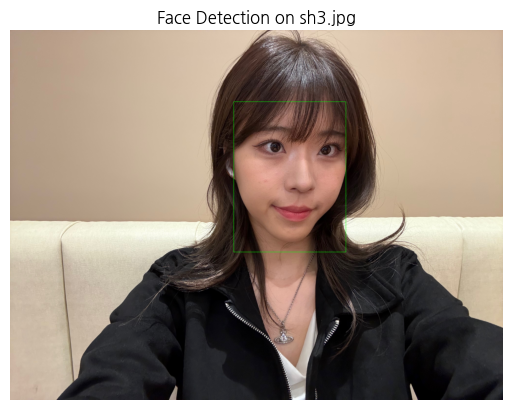

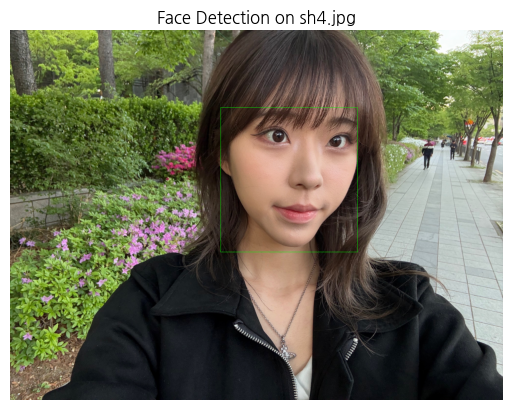

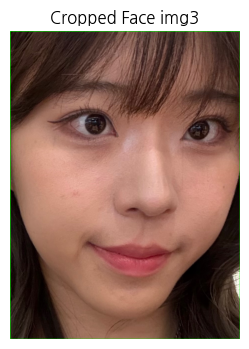

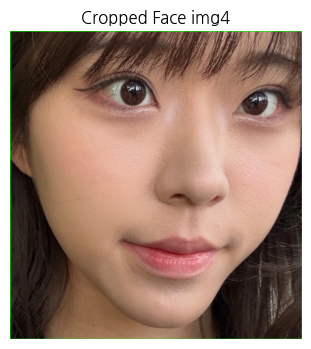

In [182]:
# 변수 초기화
img3 = None
img4 = None

# Process sh3 및 sh4
for img_name in ['sh3.jpg', 'sh4.jpg']:
    facial_area = detect_face_with_mask(img_name)

    if facial_area:
        x, y, w, h = facial_area
        # BGR → RGB
        img = cv2.imread(img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 바운딩 박스 그리기
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plt.imshow(img)
        plt.title(f"Face Detection on {img_name}")
        plt.axis('off')
        plt.show()

        # 얼굴 영역 크롭
        face_image = img[y:y+h, x:x+w]

        # 파일별로 다른 변수에 저장
        if img_name == 'sh3.jpg':
            img3 = face_image
        else:  # 'sh4.jpg'
            img4 = face_image

    else:
        print(f"No face detected in {img_name}")

if img3 is not None:
    plt.figure(figsize=(4,4))
    plt.imshow(img3)
    plt.title("Cropped Face img3")
    plt.axis('off')
if img4 is not None:
    plt.figure(figsize=(4,4))
    plt.imshow(img4)
    plt.title("Cropped Face img4")
    plt.axis('off')


In [183]:

%%time
rep3 = DeepFace.represent(
    img3,
    model_name="Facenet",
    enforce_detection=False,
    normalization="raw"
)
emb4 = rep3[0]['embedding']  # 128-d vector
print("rep3 keys:", rep3[0].keys())
print("len(emb4):", len(emb4))
print(np.array(emb4))


rep3 keys: dict_keys(['embedding', 'facial_area', 'face_confidence'])
len(emb4): 128
[    0.11106     0.25871    -0.05066    0.042194      1.4517      0.8577      1.8159     -1.0229    -0.79265     -2.7828      1.5881      -2.334    -0.91543     0.78314     -1.2314    -0.96646     0.79962     -1.8173    -0.26973    -0.53384     0.92604     -3.0356      0.6554      2.5247     0.43337      1.9816
       2.577    -0.67077    -0.84854     -2.3291     0.88111      3.1533   -0.062469     0.36054     -1.4984      1.4855      2.3922     -1.9162     0.90493      1.0991     0.65119    -0.11769     0.26444     -1.0477     -1.7245      2.5293     0.98408    0.062392     -1.2247     -2.2847      1.4753    -0.16202
      1.4528      1.6942     0.60387       4.772     0.58505     -2.3316      2.0912      1.7184     -0.7483      1.2329      1.3454     0.89696    0.012329     0.49685      2.6322    0.014741      1.2515      2.0913     0.44714      2.5199    -0.55107      2.2734     -2.3285      1.6887 

In [184]:

%%time
rep4 = DeepFace.represent(
    img4,
    model_name="Facenet",
    enforce_detection=False,
    normalization="raw"
)
emb5 = rep4[0]['embedding']  # 128-d vector
print("rep4 keys:", rep4[0].keys())
print("len(emb5):", len(emb5))
print(np.array(emb5))

rep4 keys: dict_keys(['embedding', 'facial_area', 'face_confidence'])
len(emb5): 128
[    0.95829      1.3913      1.0789    -0.63269     0.94895      1.3374      1.0379     -1.5786    -0.69969     -3.7443       1.686     -1.5768      -1.389     0.35763    -0.70413    -0.77332       1.085     -1.5731      -0.386    -0.35443      1.1956     -2.4482     0.91221      2.5277     0.59146       1.586
      2.6413    -0.42742    -0.43652     -2.2069    -0.34626      3.4865    -0.82954     0.33126     -1.2221      1.8295      3.0103     -3.2203   -0.086724      1.5089    -0.10752    -0.80452    -0.10882    -0.73765     -2.1308      2.8581      1.6268      -1.564     -2.0613     -2.3981      1.6547     -1.5206
      1.9261      1.8248     0.71005      4.6239     0.70839     -2.8289      1.6423      1.8101    -0.86676     0.52306      2.8785   -0.050756    -0.64911       1.089      3.7112    0.077321      1.4333      1.7036     0.47871       2.901    -0.55857      2.6019     -2.1811      2.5442 



*   이제 임베딩 값을 비교해본다
*  같은 이미지에 대하여 detector 가 달라짐에 따라 같은 이미지의 embedding 이 달라지는지 확인한다



In [185]:
def normalize(v):
    norm = np.linalg.norm(v)
    return v / norm if norm > 0 else v


def cosine_sim(a, b):
    return np.dot(a, b)

# 비교할 그룹
group1 = {"emb": emb, "emb1": emb1, "emb4": emb4}
group2 = {"emb3": emb3, "emb2": emb2, "emb5": emb5}


print("=== L2 Norms ===")
for name, vec in {**group1, **group2}.items():
    print(f"{name}: {np.linalg.norm(vec):.4f}")


normed1 = {name: normalize(v) for name, v in group1.items()}
normed2 = {name: normalize(v) for name, v in group2.items()}

# 3) 그룹별 cosine similarity (normalized vectors 기준 dot product)
def compare_cosine(name, grp):
    print(f"\n=== Cosine Similarity in {name} ===")
    keys = list(grp.keys())
    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            k1, k2 = keys[i], keys[j]
            sim = cosine_sim(grp[k1], grp[k2])
            print(f"{k1} vs {k2}: cosine = {sim:.4f}")

compare_cosine("emb, emb1, emb4", normed1)
compare_cosine("emb3, emb2, emb5", normed2)


=== L2 Norms ===
emb: 10.4901
emb1: 10.7125
emb4: 17.5544
emb3: 11.0918
emb2: 10.4901
emb5: 20.3670

=== Cosine Similarity in emb, emb1, emb4 ===
emb vs emb1: cosine = 0.9809
emb vs emb4: cosine = 0.0547
emb1 vs emb4: cosine = 0.0677

=== Cosine Similarity in emb3, emb2, emb5 ===
emb3 vs emb2: cosine = 0.9376
emb3 vs emb5: cosine = 0.1177
emb2 vs emb5: cosine = 0.0848


- 위 결과를 바탕으로 deepface detector (opencv, yolov8) 와 color segmentation mask detector 의 결과가 어떻게 다른지 비교해보자

  1. DeepFace 내장 탐지기(Opencv, YOLOv8)
    - 얼굴만 깔끔히 잘라내어 임베딩 Norms(≈10.5)과 코사인 유사도(≈0.91)가 높다
    -  같은 사람끼리 일관된 특징 벡터를 얻음.

    2. Color Segmentation Mask Detector
    - 배경·목이 섞여 크롭된 결과라 임베딩 Norms(≈17–20)이 크게 튄다
    - 코사인 유사도(≈0.05–0.17)가 낮아 얼굴 특징을 제대로 반영하지 못했다








- 비교한 내용을 바탕으로 어떤 detector 를 수정해야할지 판단해보자
  - 개선 대상은 Color Segmentation Mask Detector이다.
  - 더 정교한 HSV 범위 조정이나 Morphology를 설정해야할 것 같다
  - 혹은  DeepFace 검출기와 결합한 하이브리드 방식을 도입해 세그멘테이션 정확도를 높여야한다고 생각한다



  



---



# **다른 face recognition 방법 적용하기**

1. Detector 옵션 추가적으로 알아보기
  - opencv
    - 매우 빠름, 별도 의존성 없음
    - 작은 얼굴·옆 얼굴 잘 못 잡음
    - CPU 전용

  - mtcnn
    - 얼굴 탐지 + 랜드마크, 작은 얼굴도 잘 잡음
    - 느림, Python 순수 구현
  
  - retinaface
    - 최고 수준 탐지 정확도, 조명·각도 강건
    - 중간~느림, 모델 파일(ONNX)가 큼
    - 경량화 버전(ultra_light)도 있음



2. Encoder (Represent) 옵션 추가적으로 알아보기
  - VGG-Face
    - 2622차원
    - 안정적, 전통적 방식
    - 모델 크기 큼, 느림

  - Facenet
    - 128 차
    - 가볍고 빠름, 비교적 높은 정확도
    - 얼굴 각도 변화에 민감

  - OpenFace
    - 128 차원
    - 가볍고 오픈소스, 빠름
    - 정확도는 Facenet보다 조금 낮음

  - Dlib
    - 128 차원
    - 간단·경량, 랜드마크와 통합
    - 탐지 성능·정확도는 중간



3. 5주차 실습과 비교해보기 - 시간 비교
  - 시간이 압도적으로 빨라졌다
  - 이미지 비율 1:1로 수정 후 임베딩 추출 시간을 비교해보자
  - 첫 번째 이미지가 5주차 실습, wall time : 4.93s
  - 두 번째 이미지가 이번 실습, wall time : 792ms

  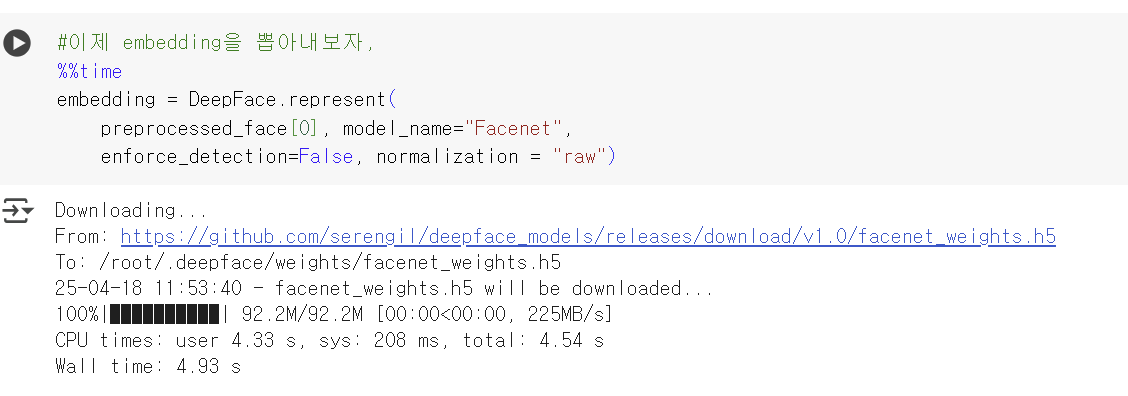

  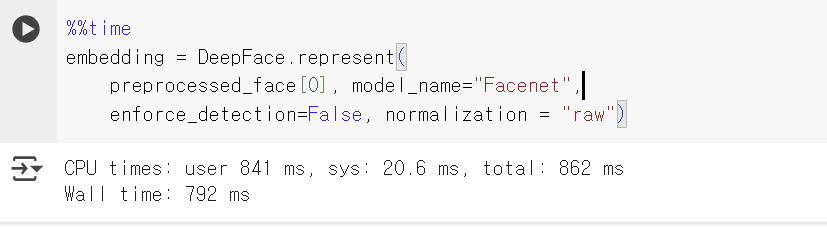

4. 5주차 실습과 비교해보기 - 정확도 비교
   - 정확도 비교를 위해 코사인 유사도를 비교해본다
   - yolo detector를 사용해서 직접 뽑은 embedding과 deepface 자동으로 뽑은 embedding 의 코사인 유사도를 비교한다
   - 첫 번째 이미지가 5주차 실습이다(1.0과 0.9854)
   - 두 번째 이미지가 이번 실습이다(0.9999와 0.9376)
   - 아주 미세하더라도 값이 0에 더 가까운 것은 이번 실습이므로 정확도가 향상 된 것을 알 수 있다

   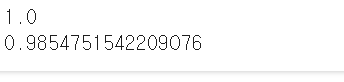

  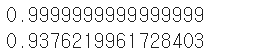
   
